## Simulating genotype-phenotype map with high-order epistasis

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Import from epistasis.simulate module
from epistasis.simulate.additive import AdditiveSimulation

### Additive epistasis

Construct an additive, binary dataset using the `quick_start` method.

In [5]:
space = AdditiveSimulation.quick_start(6,6)

Add noise to the data by sampling pseudo-replicates. 

/Users/Zsailer/virtual/py3/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/Zsailer/virtual/py3/lib/python3.5/site-packages/numpy/core/_methods.py:114: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


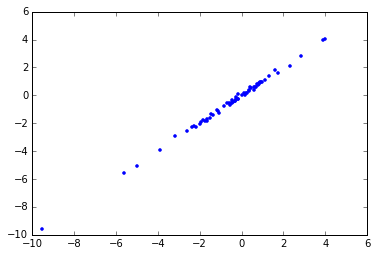

In [8]:
space.set_stdeviations(0.1)
sample = space.sample(1)
samplegpm = sample.get_gpm()

# Correlation plot between samples and actual phenotypes
plt.plot(space.phenotypes ,samplegpm.phenotypes, '.')

### Multiplicative epistasis

In [7]:
# Import from epistasis.simulate module
from epistasis.simulate.multiplicative import MultiplicativeSimulation

Construct multiplicative, binary dataset using the `quick_start` method.

In [8]:
space = MultiplicativeSimulation.quick_start(6,6)

Add noise to the data by sampling pseudo-replicates. 

/Users/Zsailer/virtual/py3/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/Zsailer/virtual/py3/lib/python3.5/site-packages/numpy/core/_methods.py:114: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


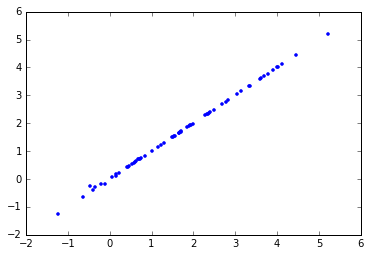

In [9]:
space.set_stdeviations(0.1)
sample = space.sample(1)
samplegpm = sample.get_gpm()

# Correlation plot between samples and actual phenotypes
plt.plot(space.log.phenotypes, samplegpm.log.phenotypes, '.')

### NK Epistasis 

In [10]:
# Import from epistasis.simulate module
from epistasis.simulate.nk import NkSimulation

Construct multiplicative, binary dataset using the `quick_start` method.

In [11]:
space = NkSimulation.quick_start(6,6)

Add noise to the data by sampling pseudo-replicates. 

/Users/Zsailer/virtual/py3/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/Zsailer/virtual/py3/lib/python3.5/site-packages/numpy/core/_methods.py:114: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


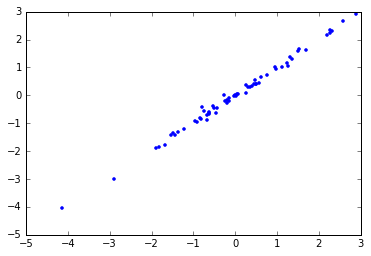

In [12]:
space.set_stdeviations(0.1)
sample = space.sample(1)
samplegpm = sample.get_gpm()

# Correlation plot between samples and actual phenotypes
plt.plot(space.phenotypes, samplegpm.phenotypes, '.')